In [ ]:
!pip install sidetable
import sidetable as stb

In [ ]:
#Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns
import sidetable
#from pandas_profiling import ProfileReport

In [ ]:
#Read in data (could be done from a file(excel/csv), API, link, or SQL dB)
#df = pd.read_csv('')
df = pd.read_csv("https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?")
df.head()


In [ ]:
#examines the first 5 rows of data
df.shape

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#examines the column names
df.columns

In [ ]:
#examines the data types in each column
df.dtypes


In [ ]:
#describe
df.describe()

In [ ]:
#let's count the values in the fruit column
df.Make.value_counts() # "." notation
#try the following, "bracket" notation []:
#df['Make'].value_counts()

In [ ]:
df.columns

In [ ]:
#What % of the market does tesla hold of the market in this dataset??
df.stb.freq(['Make'])

#resource: https://pbpython.com/sidetable.html

In [ ]:
#examine the average range(distance a vehicle can go) across all vehicles
#--we use the mean instead of the average function here
df.groupby(['Make'])['Electric Range'].agg(['mean']).sort_values(by=['mean'],ascending=False)

In [ ]:
#Let's look at the Base MSRP
df.groupby(['Make'])['Base MSRP'].agg(['mean']).sort_values(by=['mean'],ascending=False)

In [ ]:
#let's look back at our table
df.head()

## Let's Plot !
First let's look at the top 10 EV Makes

In [ ]:
top_makes = df['Make'].value_counts().head(10)
print(top_makes)

In [ ]:
# Plot the top 10 EV makes
plt.figure(figsize=(10,6))
sns.barplot(x=top_makes.index, y=top_makes.values, palette='viridis')
plt.title('Top 10 EV Makes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Top 10 most common EV models
top_models = df['Model'].value_counts().head(10)
print(top_models)

In [ ]:
# Plot the top 10 EV models
plt.figure(figsize=(10,6))
sns.barplot(x=top_models.index, y=top_models.values, palette='viridis')
plt.title('Top 10 EV Models')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Let's Visualize the Distance (Est)

In [ ]:
# Distribution of distances
plt.figure(figsize=(10,6))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='blue')
plt.title('Distribution of EV Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.show()

Reading a Box Plot :[link text](https://)

In [ ]:
# Boxplot of distances by EV make
plt.figure(figsize=(12,6))
sns.boxplot(x='Make', y='Electric Range', data=df, palette='coolwarm')
plt.title('Range by EV Make')
plt.xticks(rotation=90)
plt.show()

Box and Whisker : 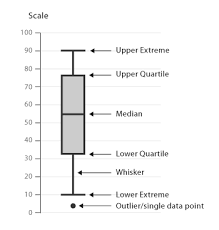

In [ ]:
# Boxplot of distances by EV model (top 10 models only)
top_models_list = df['Model'].value_counts().index[:10]
df_top_models = df[df['Model'].isin(top_models_list)]

plt.figure(figsize=(12,6))
sns.boxplot(x='Model', y='Electric Range', data=df_top_models, palette='coolwarm')
plt.title('Range by EV Model (Top 10 Models)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Display the correlation matrix
print(corr_matrix)

Correlation Analysis

In [ ]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of EV Data')
plt.show()